In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as mdates
import seaborn as sb
import numpy as np
import datetime
from datetime import datetime
%matplotlib inline

In [2]:
GE=pd.read_csv('GEStock.csv')

In [3]:
ProcterGamble=pd.read_csv('ProcterGambleStock.csv')

In [4]:
CocaCola=pd.read_csv('CocaColaStock.csv')

In [5]:
Boeing=pd.read_csv('BoeingStock.csv')

In [6]:
IBM=pd.read_csv('IBMStock.csv')

In [7]:
IBM

,Date,StockPrice
0,1/1/70,360.319048
1,2/1/70,346.723684
2,3/1/70,327.345714
3,4/1/70,319.852727
4,5/1/70,270.375238
...,...,...
475,8/1/09,118.430952
476,9/1/09,119.055714
477,10/1/09,122.239546
478,11/1/09,125.273500


In [8]:
IBM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        480 non-null    object 
 1   StockPrice  480 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [9]:
# I checked all datasets in the same way as IBM:
    # each dataset contains 480 rows
    # in each dataset the earliest year is 1970, latest year is 2009
    # in each dataset Data field has "object" dtype

In [10]:
ProcterGamble['Date']=pd.to_datetime(ProcterGamble['Date'],format='%m/%d/%y')
ProcterGamble

,Date,StockPrice
0,1970-01-01,111.874286
1,1970-02-01,111.453684
2,1970-03-01,108.451429
3,1970-04-01,106.288636
4,1970-05-01,73.332857
...,...,...
475,2009-08-01,53.098095
476,2009-09-01,55.764762
477,2009-10-01,57.518182
478,2009-11-01,61.297000


In [11]:
ProcterGamble.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        480 non-null    datetime64[ns]
 1   StockPrice  480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [12]:
GE['Date']=pd.to_datetime(GE['Date'],format='%m/%d/%y')
CocaCola['Date']=pd.to_datetime(CocaCola['Date'],format='%m/%d/%y')
Boeing['Date']=pd.to_datetime(Boeing['Date'],format='%m/%d/%y')
IBM['Date']=pd.to_datetime(IBM['Date'],format='%m/%d/%y')

In [53]:
CocaCola.mean()#average stock price of CocaCola is 60.029730

<ipython-input-53-904d64e28fa4>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  CocaCola.mean()#average stock price of CocaCola is 60.029730


CC_StockPrice     60.02973
Dinamic_ave      100.04955
dtype: float64

In [14]:
IBM.describe()#maximum stock price for ibm is 438.901579

,StockPrice
count,480.000000
mean,144.375030
std,87.822078
min,43.395000
25%,88.343929
50%,112.114595
75%,165.407284
max,438.901579


In [15]:
ProcterGamble.describe()#standard deviation of P&G stock price is 18.194140

,StockPrice
count,480.000000
mean,77.704516
std,18.194140
min,46.884545
25%,62.478663
50%,78.336077
75%,89.468375
max,149.620000


In [16]:
filtered_boeing=Boeing.loc[(Boeing['Date']>='2005-01-01')&(Boeing['Date']<'2010-01-01')]

In [17]:
filtered_boeing.median()#median stock price for Boeing in the last 5 years is 69.675667

<ipython-input-17-bf9482b8e83a>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  filtered_boeing.median()#median stock price for Boeing in the last 5 years is 69.675667


StockPrice    69.675667
dtype: float64

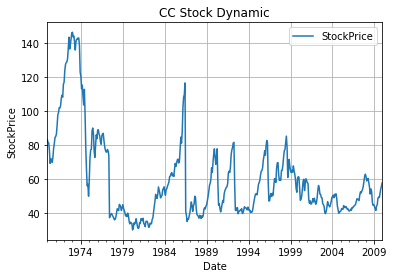

In [18]:
CocaCola.plot(x='Date',y='StockPrice',grid=True)
plt.xlabel('Date')
plt.ylabel('StockPrice')
plt.title('CC Stock Dynamic')
plt.show()

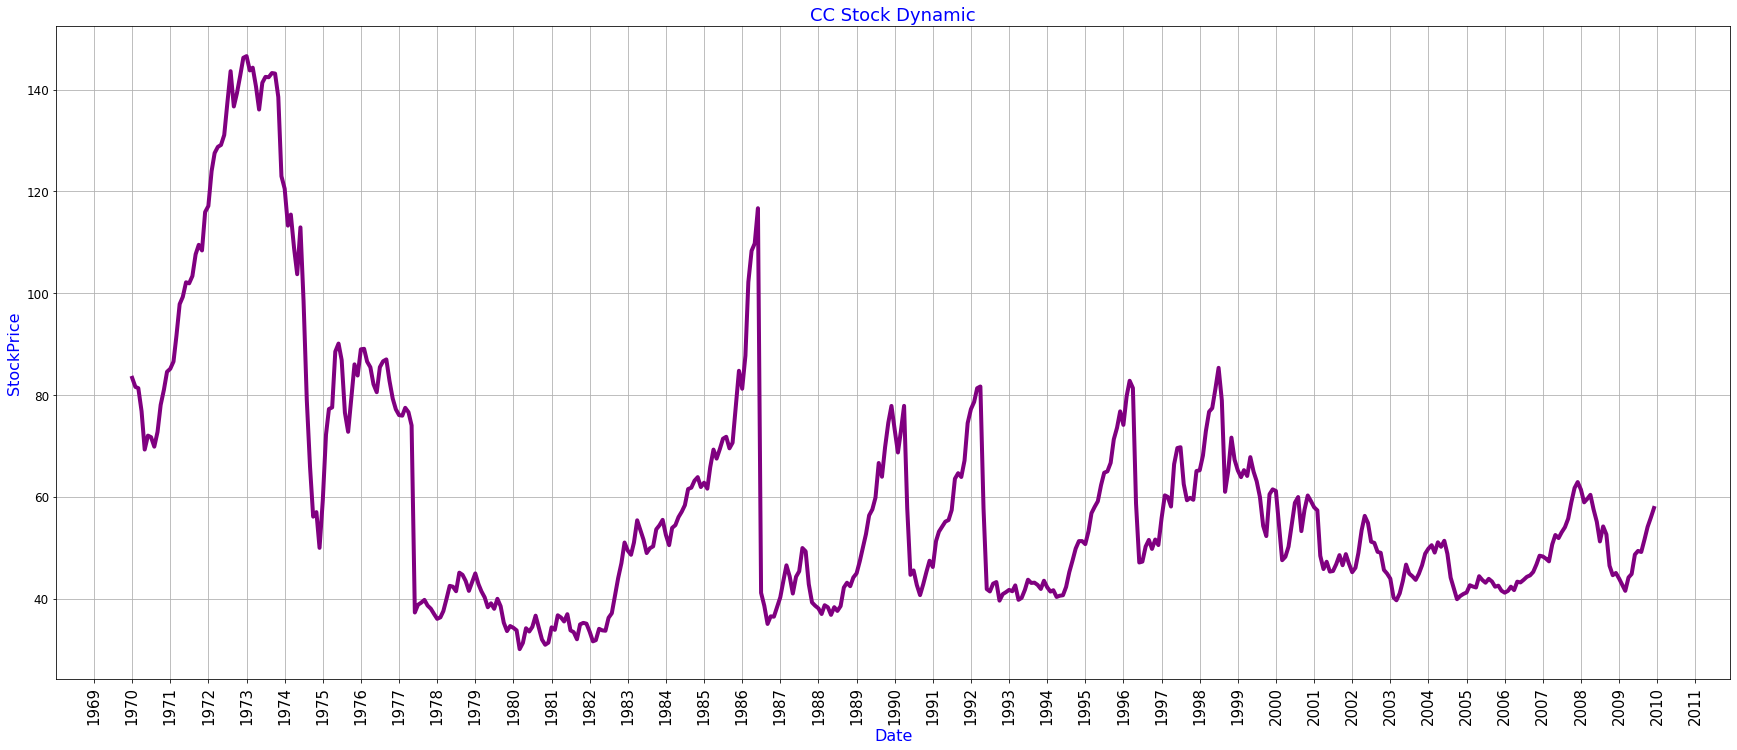

In [19]:
#to explore year-to-year changes in stock I'm going to set one year interval 
from matplotlib.dates import DateFormatter
fig, ax = plt.subplots(figsize=(30, 12))
ax.plot(CocaCola['Date'],CocaCola['StockPrice'],color='purple',linewidth=4.0)
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=16,color='blue')
plt.ylabel('StockPrice',fontsize=16,color='blue')
plt.title('CC Stock Dynamic',fontsize=18,color='blue')
plt.show()

In [20]:
#CocaCola had the highest stock price in the end of 1972
#CocaCola had the lowest stock price in the beginning of 1980
#Y-O-Y percentage increase=(stock price at the end of year-stock price at the end of last year )/stock price at the end of last year
#CocaCola looks to have had the biggest Y-O-Y percentage increase in 1982-1983 period (around 150%)

In [21]:
ProcterGamble.columns=['Date','PG_StockPrice']
CocaCola.columns=['Date','CC_StockPrice']
df=ProcterGamble.merge(CocaCola)
df

,Date,PG_StockPrice,CC_StockPrice
0,1970-01-01,111.874286,83.368095
1,1970-02-01,111.453684,81.591053
2,1970-03-01,108.451429,81.338095
3,1970-04-01,106.288636,76.805909
4,1970-05-01,73.332857,69.278571
...,...,...,...
475,2009-08-01,53.098095,49.150952
476,2009-09-01,55.764762,51.588571
477,2009-10-01,57.518182,54.090000
478,2009-11-01,61.297000,55.908000


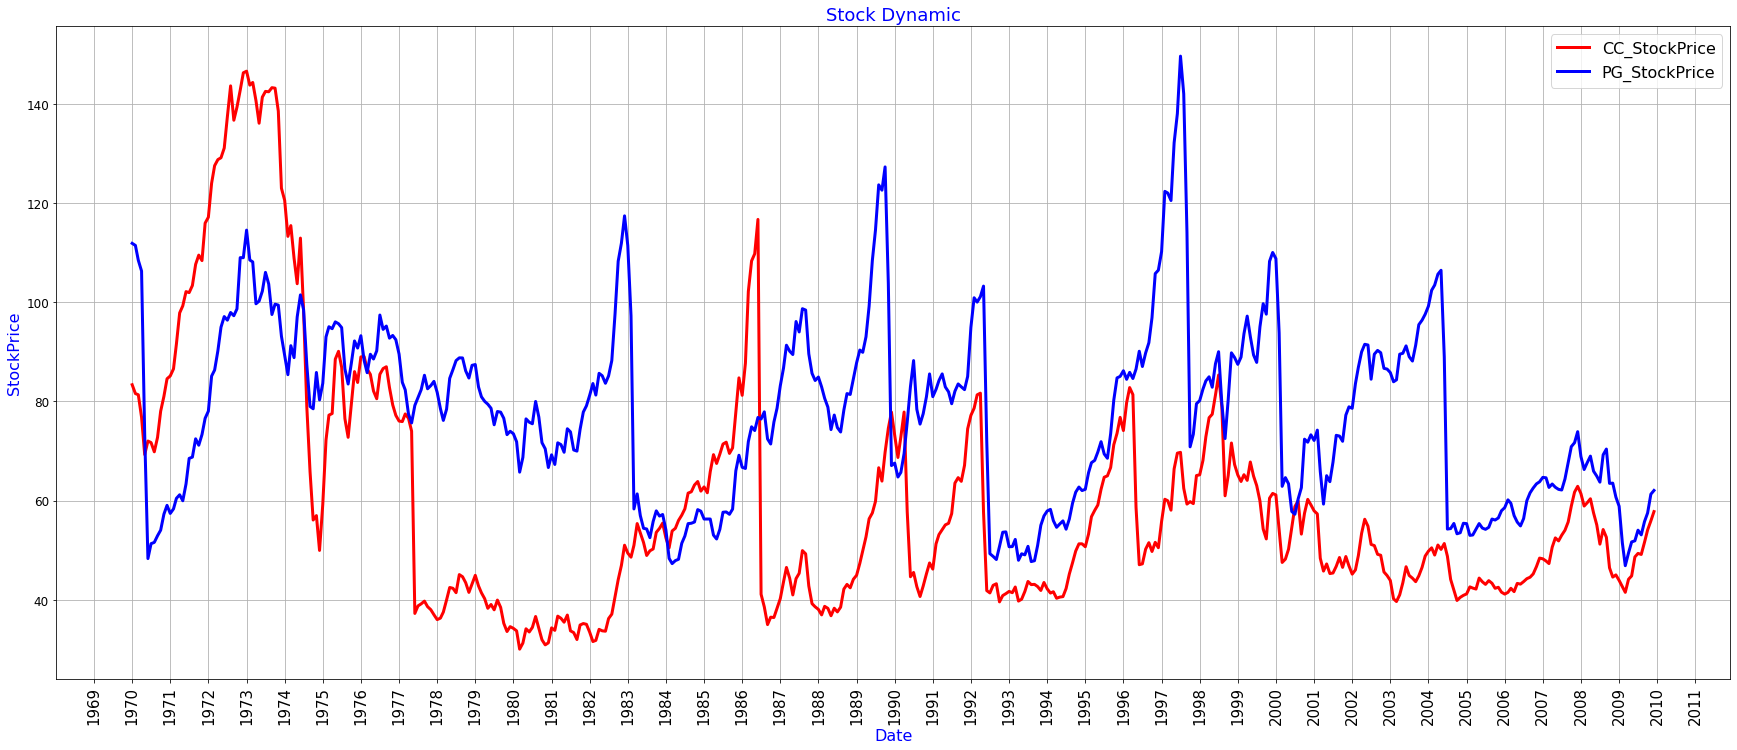

In [22]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.plot(df.Date,df.CC_StockPrice, color='red', label='CC_StockPrice',linewidth=3.0)
ax.plot(df.Date,df.PG_StockPrice, color='blue', label='PG_StockPrice',linewidth=3.0)
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.legend(loc='upper right',fontsize=16)
plt.xticks(rotation='vertical',fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=16,color='blue')
plt.ylabel('StockPrice',fontsize=16,color='blue')
plt.title('Stock Dynamic',fontsize=18,color='blue')
plt.show()

In [23]:
#In March 2000 PG's stock dropped almost twice as much as CocaCola's stock did (about 40% and 25% respectively)
#In 1983 CocaCola's stock was going up in average, and PG's stock was going down
#Generally,CocaCola's stock had a lower price across 1970-2010 period

In [24]:
CocaCola.loc[(CocaCola['Date']>='1995-01-01')&(CocaCola['Date']<='2005-12-01')]

,Date,CC_StockPrice
300,1995-01-01,50.699524
301,1995-02-01,53.245789
302,1995-03-01,56.763913
303,1995-04-01,58.029474
304,1995-05-01,59.116364
...,...,...
427,2005-08-01,43.870870
428,2005-09-01,43.346190
429,2005-10-01,42.326190
430,2005-11-01,42.530000


In [25]:
#row numbers representing the Dates 1995-2005 are from 300 to 431

In [26]:
GE.columns=['Date','GE_StockPrice']
IBM.columns=['Date','IBM_StockPrice']
Boeing.columns=['Date','B_StockPrice']
df1=Boeing.merge(GE)
df2=df1.merge(IBM)
df3=df2.merge(CocaCola)
df4=df3.merge(Boeing)
df5=df4.merge(ProcterGamble)
filtered_df=df5.loc[(df5['Date']>='1995-01-01')&(df5['Date']<='2005-12-01')]
filtered_df

,Date,B_StockPrice,GE_StockPrice,IBM_StockPrice,CC_StockPrice,PG_StockPrice
300,1995-01-01,47.437619,51.061905,74.849048,50.699524,62.282381
301,1995-02-01,46.580526,52.990000,74.589474,53.245789,65.622632
302,1995-03-01,48.437826,54.121739,81.323478,56.763913,67.649565
303,1995-04-01,54.562105,54.989474,87.904737,58.029474,68.115789
304,1995-05-01,55.763182,57.263182,94.248182,59.116364,69.792727
...,...,...,...,...,...,...
427,2005-08-01,66.727391,33.940870,82.132174,43.870870,54.620870
428,2005-09-01,64.880000,33.790476,79.588571,43.346190,56.290476
429,2005-10-01,66.889524,33.831905,82.063333,42.326190,56.091905
430,2005-11-01,66.819048,34.830476,85.243810,42.530000,56.510000


<AxesSubplot:xlabel='Date'>

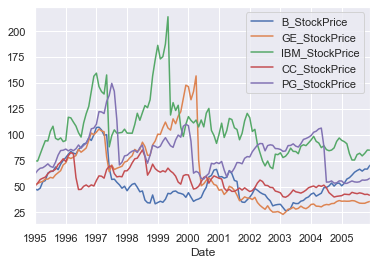

In [27]:
sb.set()
filtered_df.plot(x='Date')

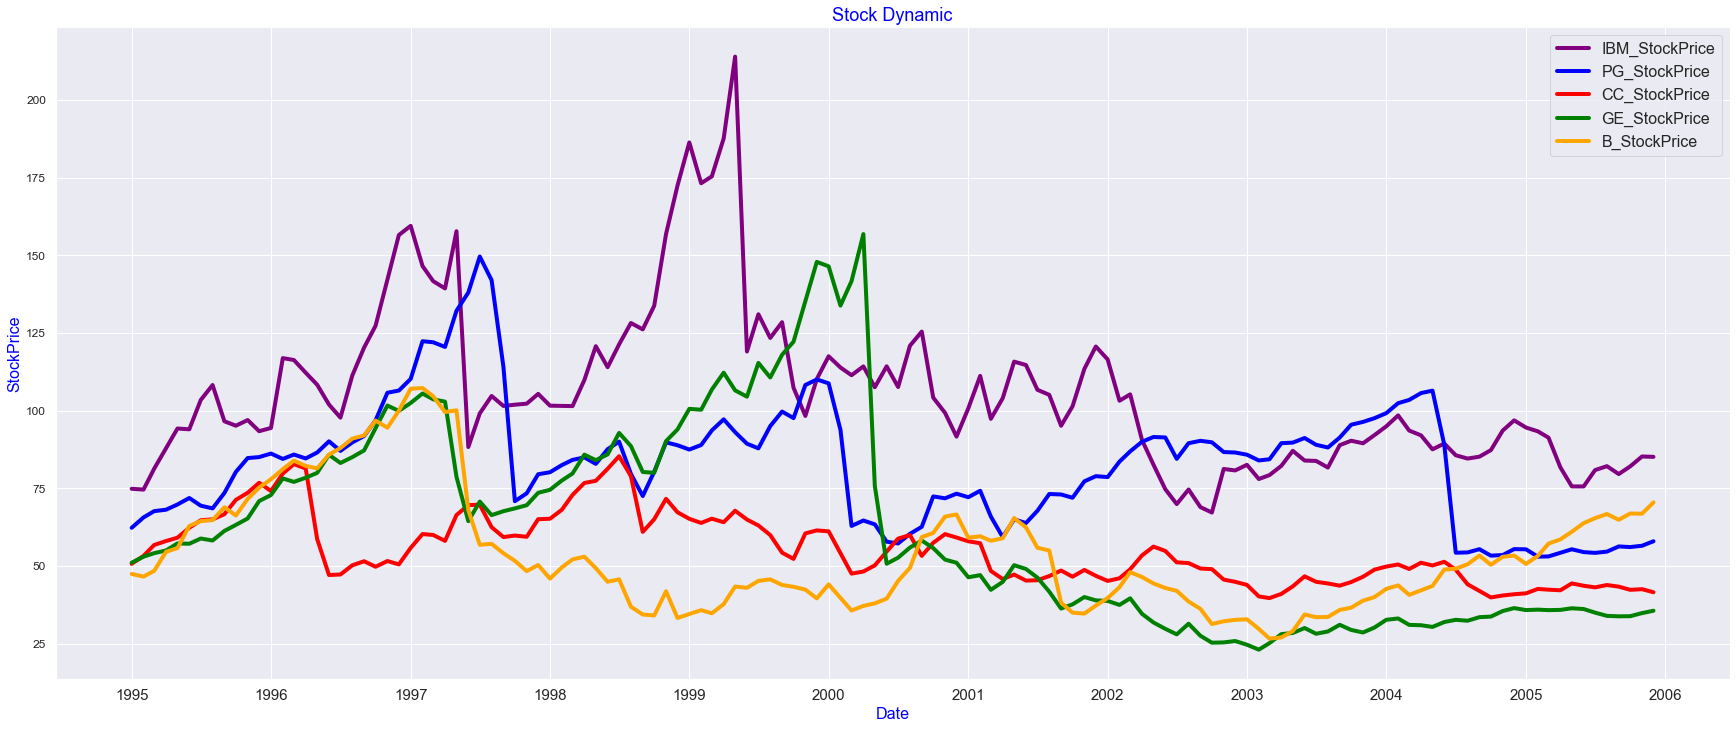

In [28]:
fig, ax = plt.subplots(figsize=(30, 12))
ax.plot(filtered_df['Date'],filtered_df['IBM_StockPrice'],color='purple', linewidth=4.0,label='IBM_StockPrice')
ax.plot(filtered_df['Date'],filtered_df['PG_StockPrice'],color='blue', linewidth=4.0,label='PG_StockPrice')
ax.plot(filtered_df['Date'],filtered_df['CC_StockPrice'],color='red', linewidth=4.0,label='CC_StockPrice')
ax.plot(filtered_df['Date'],filtered_df['GE_StockPrice'],color='green', linewidth=4.0,label='GE_StockPrice')
ax.plot(filtered_df['Date'],filtered_df['B_StockPrice'],color='orange', linewidth=4.0,label='B_StockPrice')
date_form = DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.legend(loc='upper right',fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=16,color='blue')
plt.ylabel('StockPrice',fontsize=16,color='blue')
plt.title('Stock Dynamic',fontsize=18,color='blue')
plt.show()

In [50]:
#GE stock price fell most after the tech bubble of March 2000
#IBM had the maximum price in 1995-2005 period
#PG,Boeing and CocaCola saw a decrease in price from Sep 1997 to Nov 1997. PG experienced the biggest decrease
#Boeing seemed to provide the best return in 2004-2005 period
#IBM had the biggest delta between max and min stock prices in 1995-2005
#IBM's and GE's stock prices seem to be the most correlated

In [51]:
#To explore monthly trends and patterns:
#  I will find overall average stock price for each dataset and consider it as 100%
#  Create a new variable 'Dinamic_ave'= stock price/(average stock price/100). If the result >100 it's over-indexing 
#  Find mean of stock price and dinamic average for each month across the entire datasets

In [52]:
#IBM.mean is 144.375030

In [40]:
IBM['Dinamic_ave']=IBM['IBM_StockPrice']/1.444
ibm_ave=IBM.groupby(IBM['Date'].dt.month).mean
ibm_ave()

,IBM_StockPrice,Dinamic_ave
Date,,
1,150.238423,104.043229
2,152.693993,105.743763
3,152.432690,105.562804
4,152.116824,105.344061
5,151.502194,104.918417
6,139.090676,96.323183
7,139.067018,96.306799
8,140.145475,97.053653
9,139.088527,96.321694


In [41]:
#IBM historically had an over-indexing in January-May period with the most over-indexing in February. 

In [45]:
# ProcterGamble.mean is 77.704516 

In [46]:
ProcterGamble['Dinamic_ave']=ProcterGamble['PG_StockPrice']/0.777
pg_ave=ProcterGamble.groupby(ProcterGamble['Date'].dt.month).mean
pg_ave()

,PG_StockPrice,Dinamic_ave
Date,,
1,79.617984,102.468449
2,79.025755,101.706248
3,77.347607,99.546470
4,77.686708,99.982893
5,77.859578,100.205378
6,77.392751,99.604571
7,76.645559,98.642934
8,76.822663,98.870866
9,76.623845,98.614987


In [ ]:
#PG historically had an over-indexing in January and February with the most over-indexing in January. 

In [32]:
CocaCola.mean()

<ipython-input-32-7d6a0c2d747e>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  CocaCola.mean()


CC_StockPrice    60.02973
dtype: float64

In [47]:
CocaCola['Dinamic_ave']=CocaCola['CC_StockPrice']/0.60
cc_ave=CocaCola.groupby(CocaCola['Date'].dt.month).mean
cc_ave()

,CC_StockPrice,Dinamic_ave
Date,,
1,60.368487,100.614144
2,60.734754,101.224590
3,62.071354,103.452257
4,62.688882,104.481470
5,61.443581,102.405968
6,60.812084,101.353474
7,58.983460,98.305767
8,58.880139,98.133565
9,57.600238,96.000397


In [ ]:
#CC historically had an over-indexing in February-June period with the the most over-indexing in April. 

In [34]:
GE.mean()

<ipython-input-34-82ac5f28c9a4>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  GE.mean()


GE_StockPrice    59.303504
dtype: float64

In [48]:
GE['Dinamic_ave']=GE['GE_StockPrice']/0.593
ge_ave=GE.groupby(GE['Date'].dt.month).mean
ge_ave()

,GE_StockPrice,Dinamic_ave
Date,,
1,62.045106,104.629184
2,62.520805,105.431374
3,63.150548,106.493335
4,64.480092,108.735399
5,60.871351,102.649833
6,56.468439,95.225024
7,56.733493,95.671995
8,56.503149,95.283556
9,56.239131,94.838331


In [ ]:
#GE historically had an over-indexing in January-May period with the the most over-indexing in April. 

In [36]:
Boeing.mean()

<ipython-input-36-bead6496461d>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Boeing.mean()


B_StockPrice    46.592934
dtype: float64

In [49]:
Boeing['Dinamic_ave']=Boeing['B_StockPrice']/0.4659
b_ave=Boeing.groupby(Boeing['Date'].dt.month).mean
b_ave()

,B_StockPrice,Dinamic_ave
Date,,
1,46.510974,99.830380
2,46.892233,100.648708
3,46.882076,100.626907
4,47.046860,100.980598
5,48.137160,103.320797
6,47.385255,101.706922
7,46.553602,99.921876
8,46.863107,100.586193
9,46.304854,99.387967


In [ ]:
#Boeing historically had an over-indexing in May and June with the most over-indexing in May. 

In [ ]:
# All companies have higher stock prices during the first half of the year comparing to the second one.
# All companies have increasing in stock prices in January comparing to December stock prices.
# CC and GE both have the most over-indexing in April.
# IBM and GE both have January-May over-indexing period.
# PG and Boeing both have shorter over-indexing period comparing to other companies (two months).